拿环科院这个点和剖面上最靠近环科院的那个点比较一下，以hadv为例，看看是不是差异很大

In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.io.shapereader import Reader

import sys
sys.path.append('../src/')
from findpoint import findpoint
import ModelEvaLib as me

In [9]:
pa=xr.open_dataset('F:/Data/case_anqing/April/April_PA1.nc')

lat = pa.latitude
lon = pa.longitude

ncfile = pa.HDIF_O3
HADV = pa.HADV_O3

In [6]:
siteloc = pd.read_excel('F:/Data/case_anqing/April/obsdata/安庆市站点坐标.xlsx',header=0,index_col=0)

sites = ['安庆大学','市人大','环科院','马山宾馆','安庆政务中心']

lono = siteloc[siteloc.index.isin(sites)]['经度']
lato = siteloc[siteloc.index.isin(sites)]['纬度']

print(lono,'\n',lato)

站点名称
安庆大学      116.9898
市人大       117.0597
环科院       117.0807
马山宾馆      117.0331
安庆政务中心    117.1150
Name: 经度, dtype: float64 
 站点名称
安庆大学      30.6146
市人大       30.5351
环科院       30.5177
马山宾馆      30.5119
安庆政务中心    30.5337
Name: 纬度, dtype: float64


In [33]:
x_index=[]
y_index=[]

# for name in sites:
#     out_x, out_y = findpoint(lono[name],lato[name],ncfile)
#     x_index.append(out_x)
#     y_index.append(out_y)

out_x, out_y = findpoint(lono['环科院'],lato['环科院'],ncfile)
x_index.append(out_x)
y_index.append(out_y)

hadv = HADV.isel(x=x_index, y=y_index).squeeze()
print(x_index,y_index)


[75] [56]


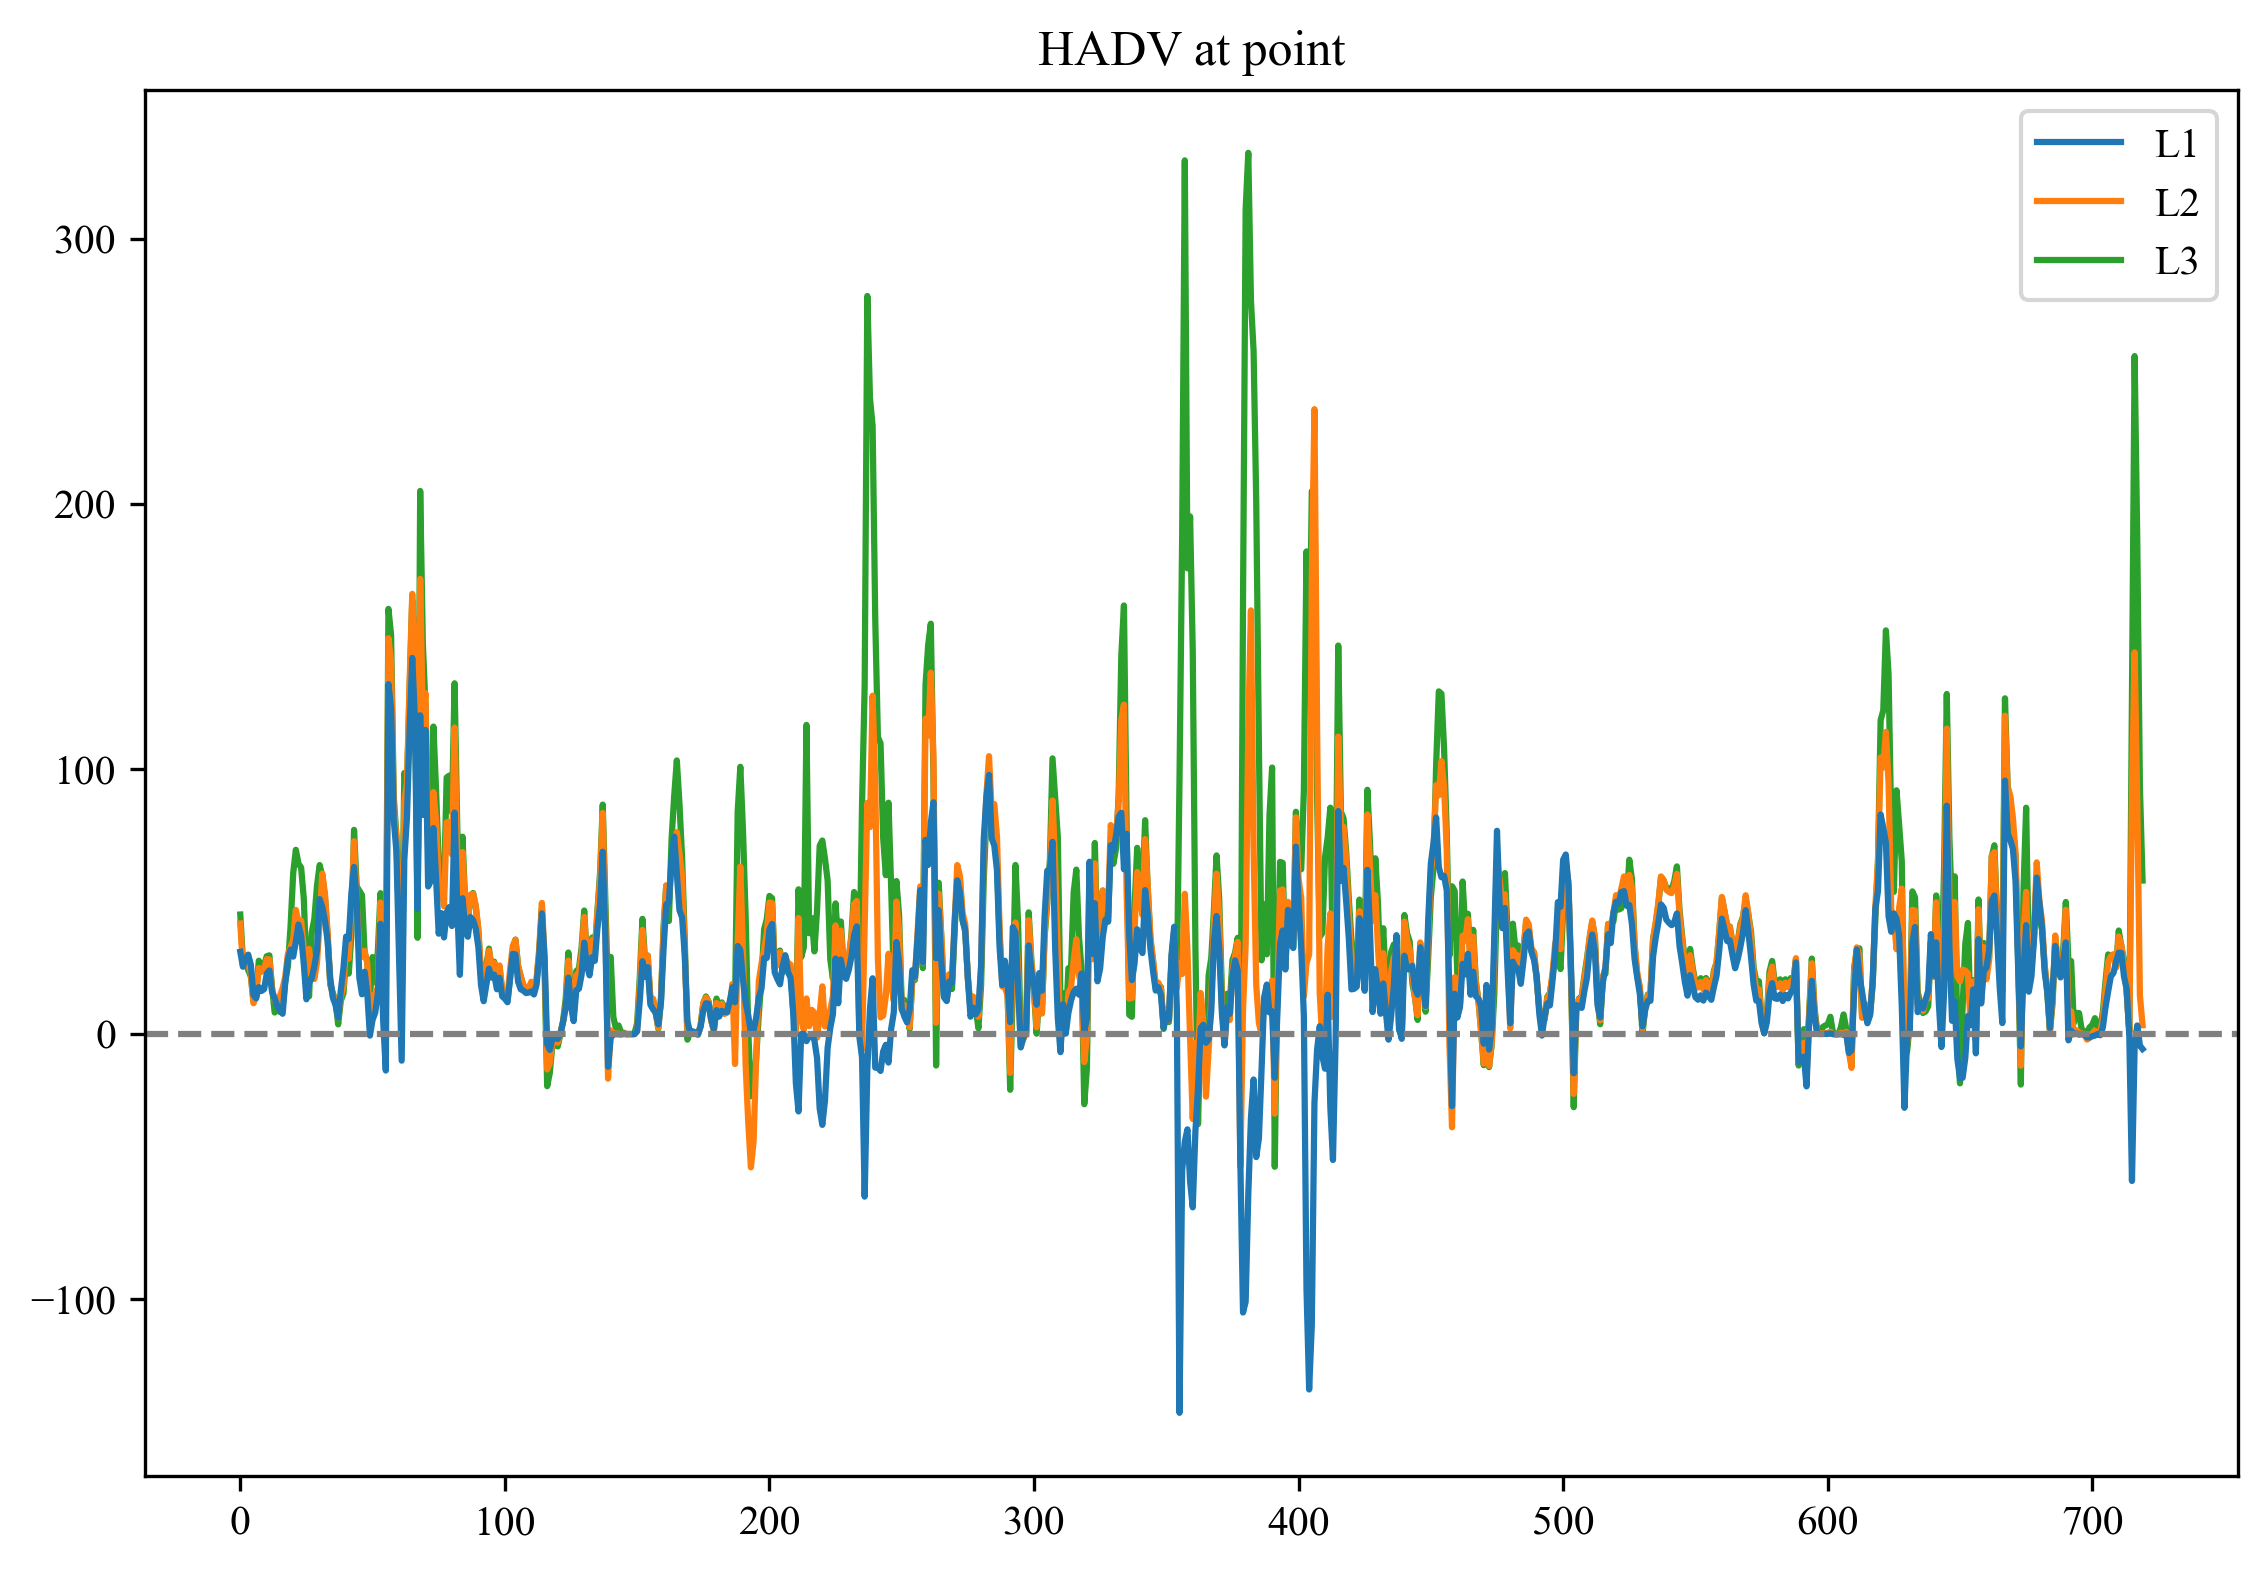

In [19]:
fig = plt.figure(figsize=(9,6),dpi=300)
ax = fig.subplots(1,1)

tstep = np.arange(0,720)
ax.plot(tstep,hadv[:,0],label='L1',zorder=2)
ax.plot(tstep,hadv[:,1],label='L2',zorder=1)
ax.plot(tstep,hadv[:,2],label='L3',zorder=0)

ax.axhline(y=0,linestyle='--',color='gray')
ax.legend(loc=1)
ax.set_title('HADV at point')
plt.show()

In [34]:
x_index=[]
y_index=[]
out_x, out_y = findpoint(117.1143,30.52857,ncfile)
x_index.append(out_x)
y_index.append(out_y)

hadv_line1 = HADV.isel(x=x_index, y=y_index).squeeze()
print(x_index,y_index)


[76] [56]


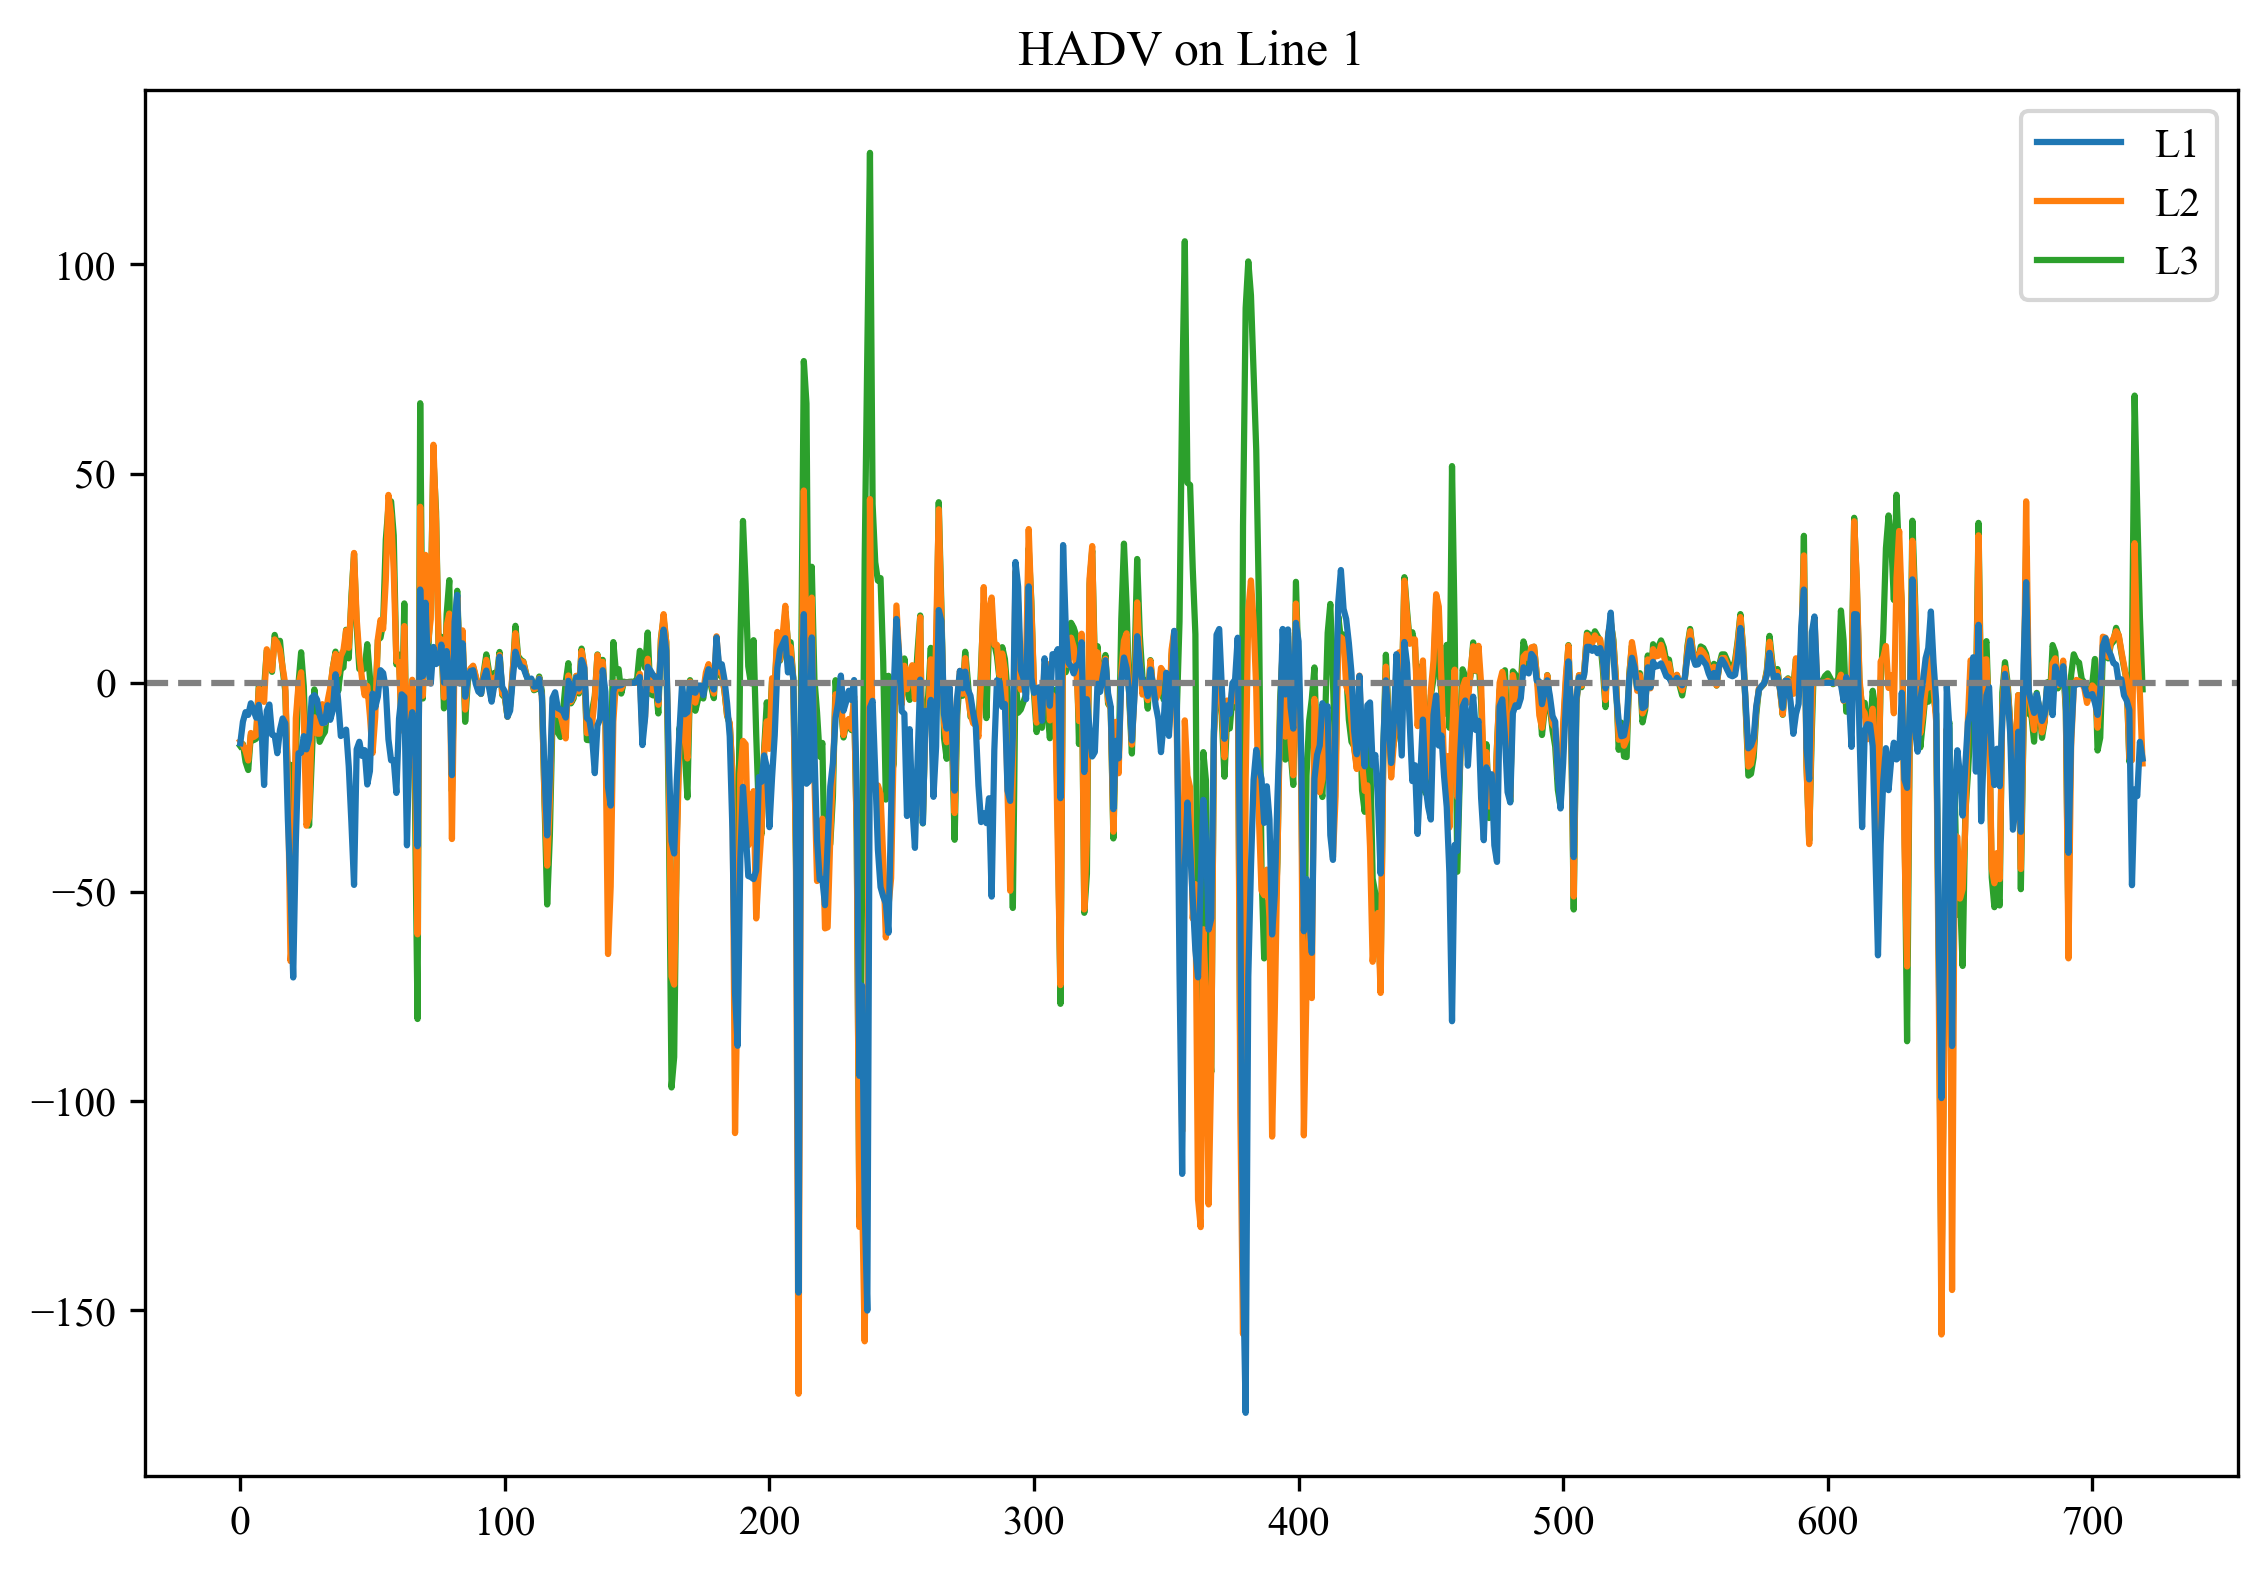

In [23]:
fig = plt.figure(figsize=(9,6),dpi=300)
ax = fig.subplots(1,1)

tstep = np.arange(0,720)
ax.plot(tstep,hadv_line1[:,0],label='L1',zorder=2)
ax.plot(tstep,hadv_line1[:,1],label='L2',zorder=1)
ax.plot(tstep,hadv_line1[:,2],label='L3',zorder=0)

ax.axhline(y=0,linestyle='--',color='gray')
ax.legend(loc=1)
ax.set_title('HADV on Line 1')
plt.show()

In [35]:
x_index=[]
y_index=[]
out_x, out_y = findpoint(117.002,30.53265,ncfile)
x_index.append(out_x)
y_index.append(out_y)

hadv_line2 = HADV.isel(x=x_index, y=y_index).squeeze()
print(x_index,y_index)


[72] [56]


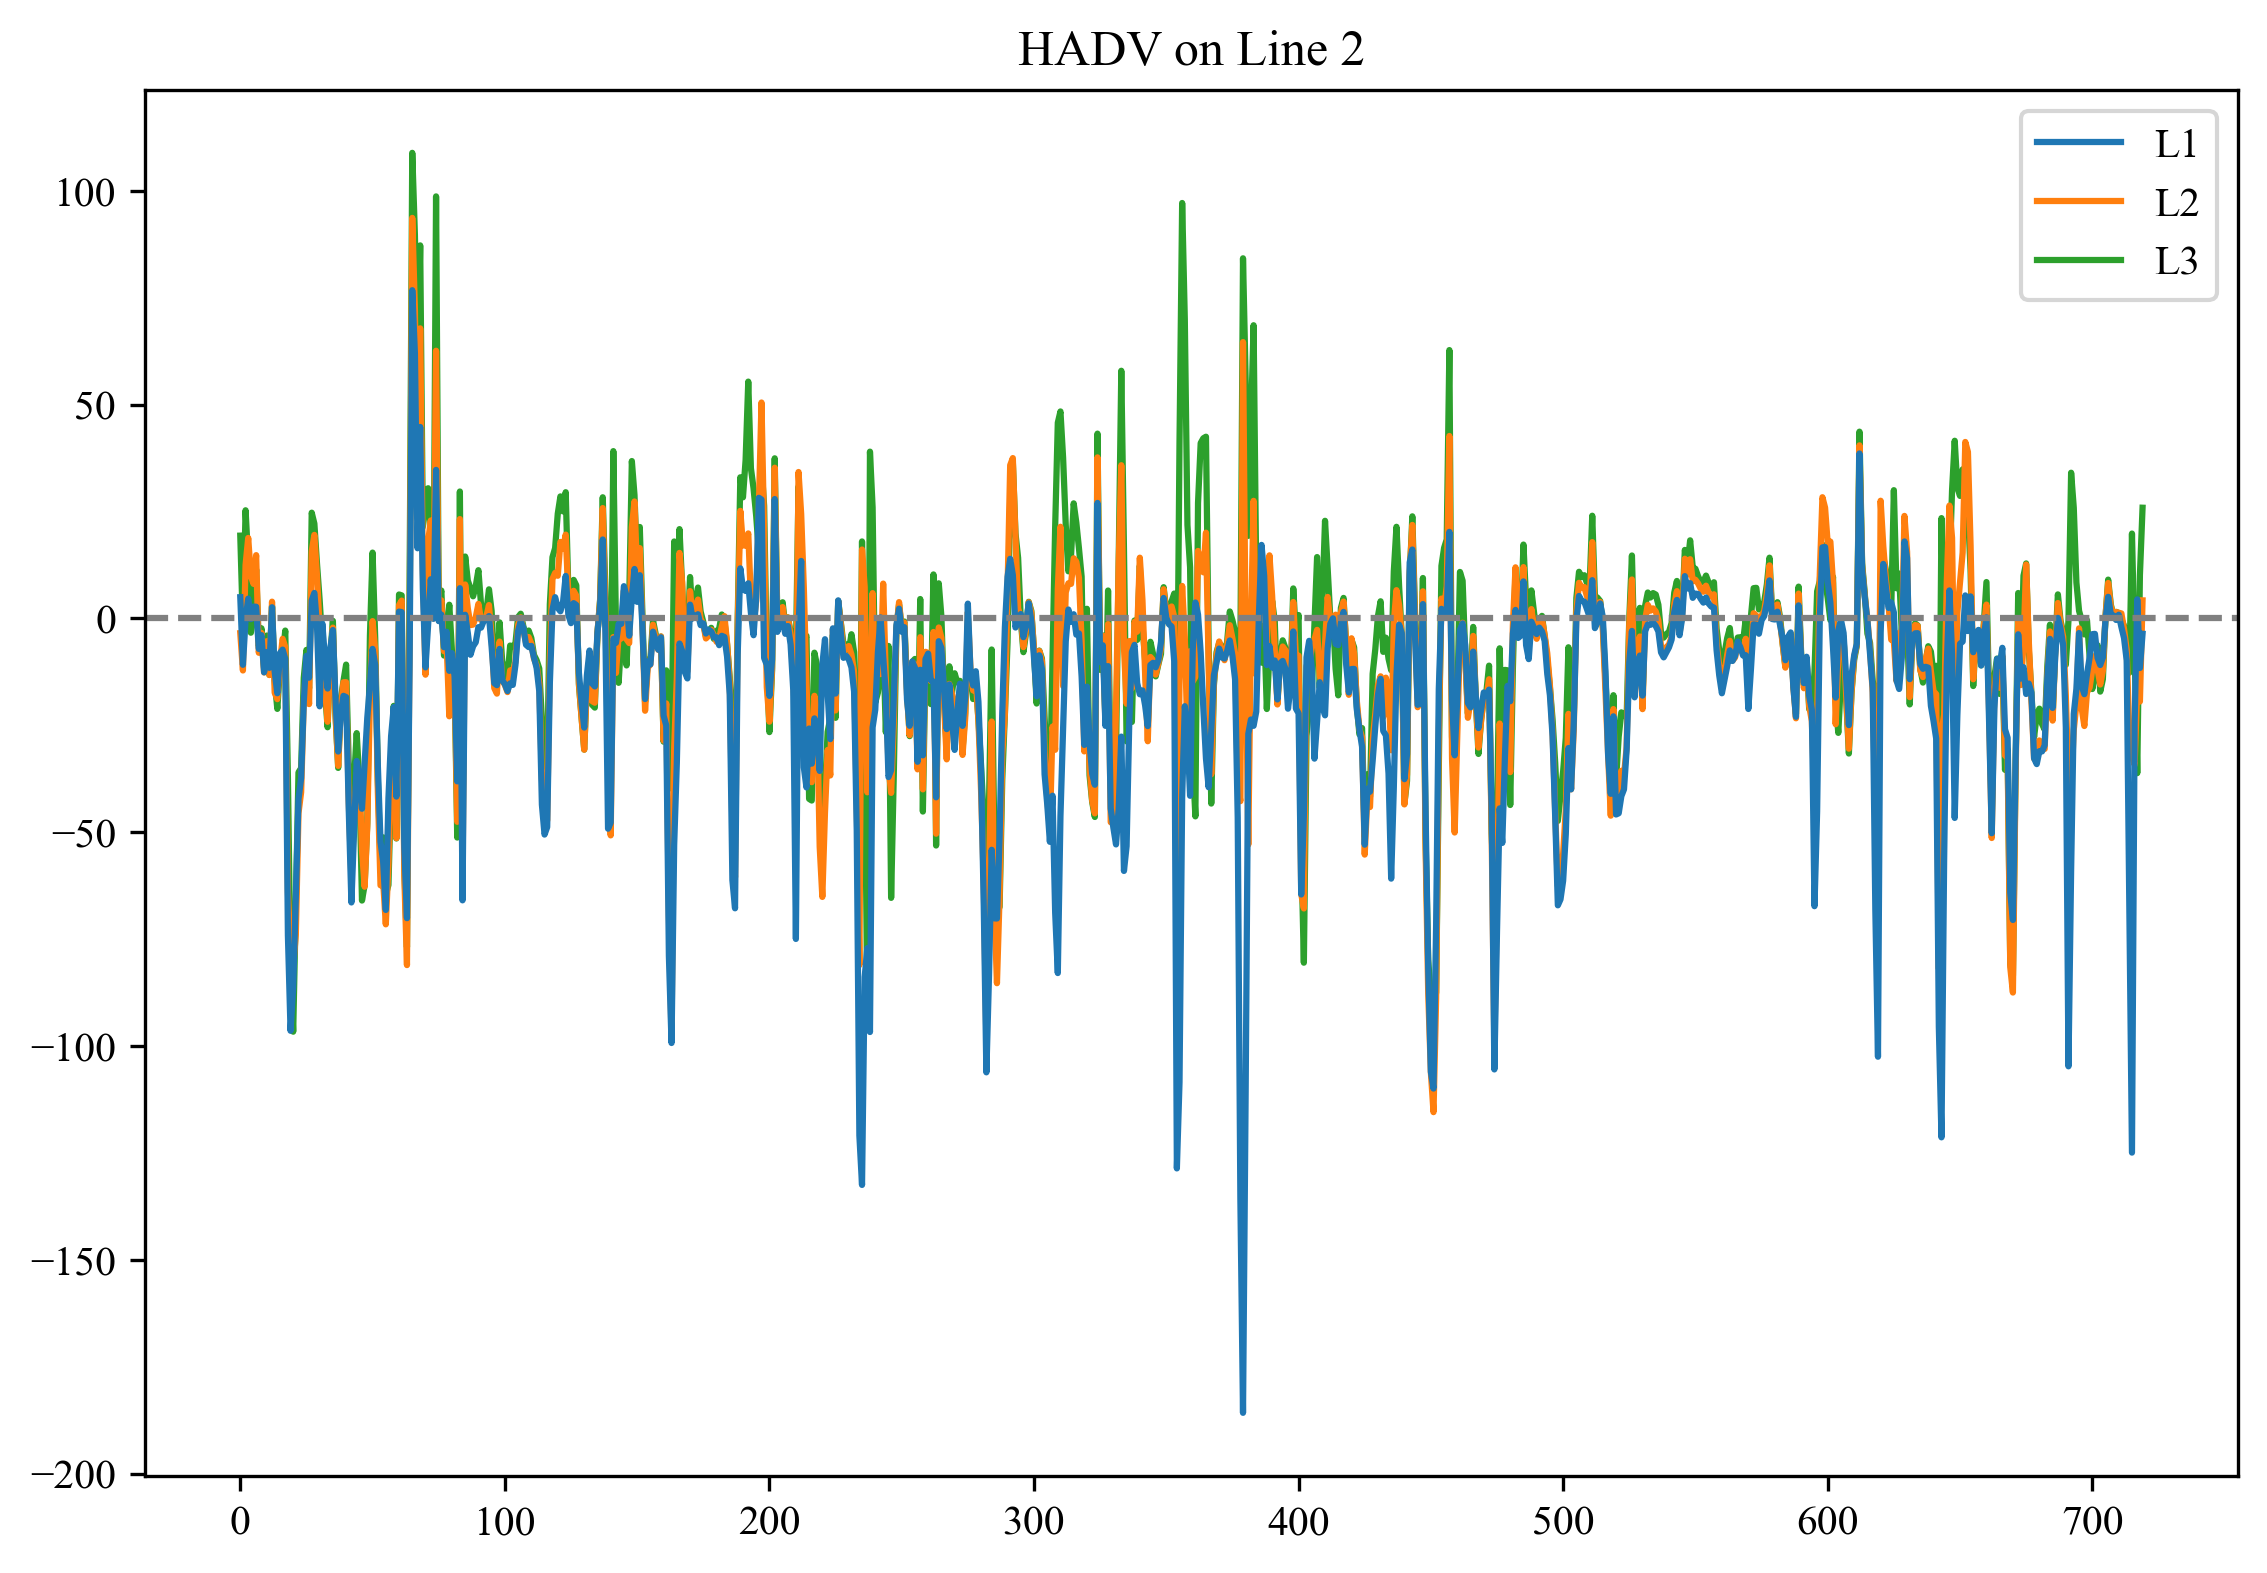

In [29]:
fig = plt.figure(figsize=(9,6),dpi=300)
ax = fig.subplots(1,1)

tstep = np.arange(0,720)
ax.plot(tstep,hadv_line2[:,0],label='L1',zorder=2)
ax.plot(tstep,hadv_line2[:,1],label='L2',zorder=1)
ax.plot(tstep,hadv_line2[:,2],label='L3',zorder=0)

ax.axhline(y=0,linestyle='--',color='gray')
ax.legend(loc=1)
ax.set_title('HADV on Line 2')
plt.show()

In [26]:
print(hadv.latitude,hadv.longitude)

<xarray.DataArray 'latitude' ()>
array(30.521877, dtype=float32)
Coordinates:
    latitude   float32 30.52
    longitude  float32 117.1 <xarray.DataArray 'longitude' ()>
array(117.08551, dtype=float32)
Coordinates:
    latitude   float32 30.52
    longitude  float32 117.1


In [27]:
print(hadv_line1.latitude,hadv_line1.longitude)

<xarray.DataArray 'latitude' ()>
array(30.52118, dtype=float32)
Coordinates:
    latitude   float32 30.52
    longitude  float32 117.1 <xarray.DataArray 'longitude' ()>
array(117.11755, dtype=float32)
Coordinates:
    latitude   float32 30.52
    longitude  float32 117.1


In [30]:
print(hadv_line2.latitude,hadv_line2.longitude)

<xarray.DataArray 'latitude' ()>
array(30.523926, dtype=float32)
Coordinates:
    latitude   float32 30.52
    longitude  float32 117.0 <xarray.DataArray 'longitude' ()>
array(116.98938, dtype=float32)
Coordinates:
    latitude   float32 30.52
    longitude  float32 117.0


In [37]:
hadv_p1 = HADV.isel(x=76, y=56).squeeze()
hadv_p2 = HADV.isel(x=74, y=56).squeeze()
hadv_p3 = HADV.isel(x=75, y=55).squeeze()
hadv_p4 = HADV.isel(x=75, y=57).squeeze()

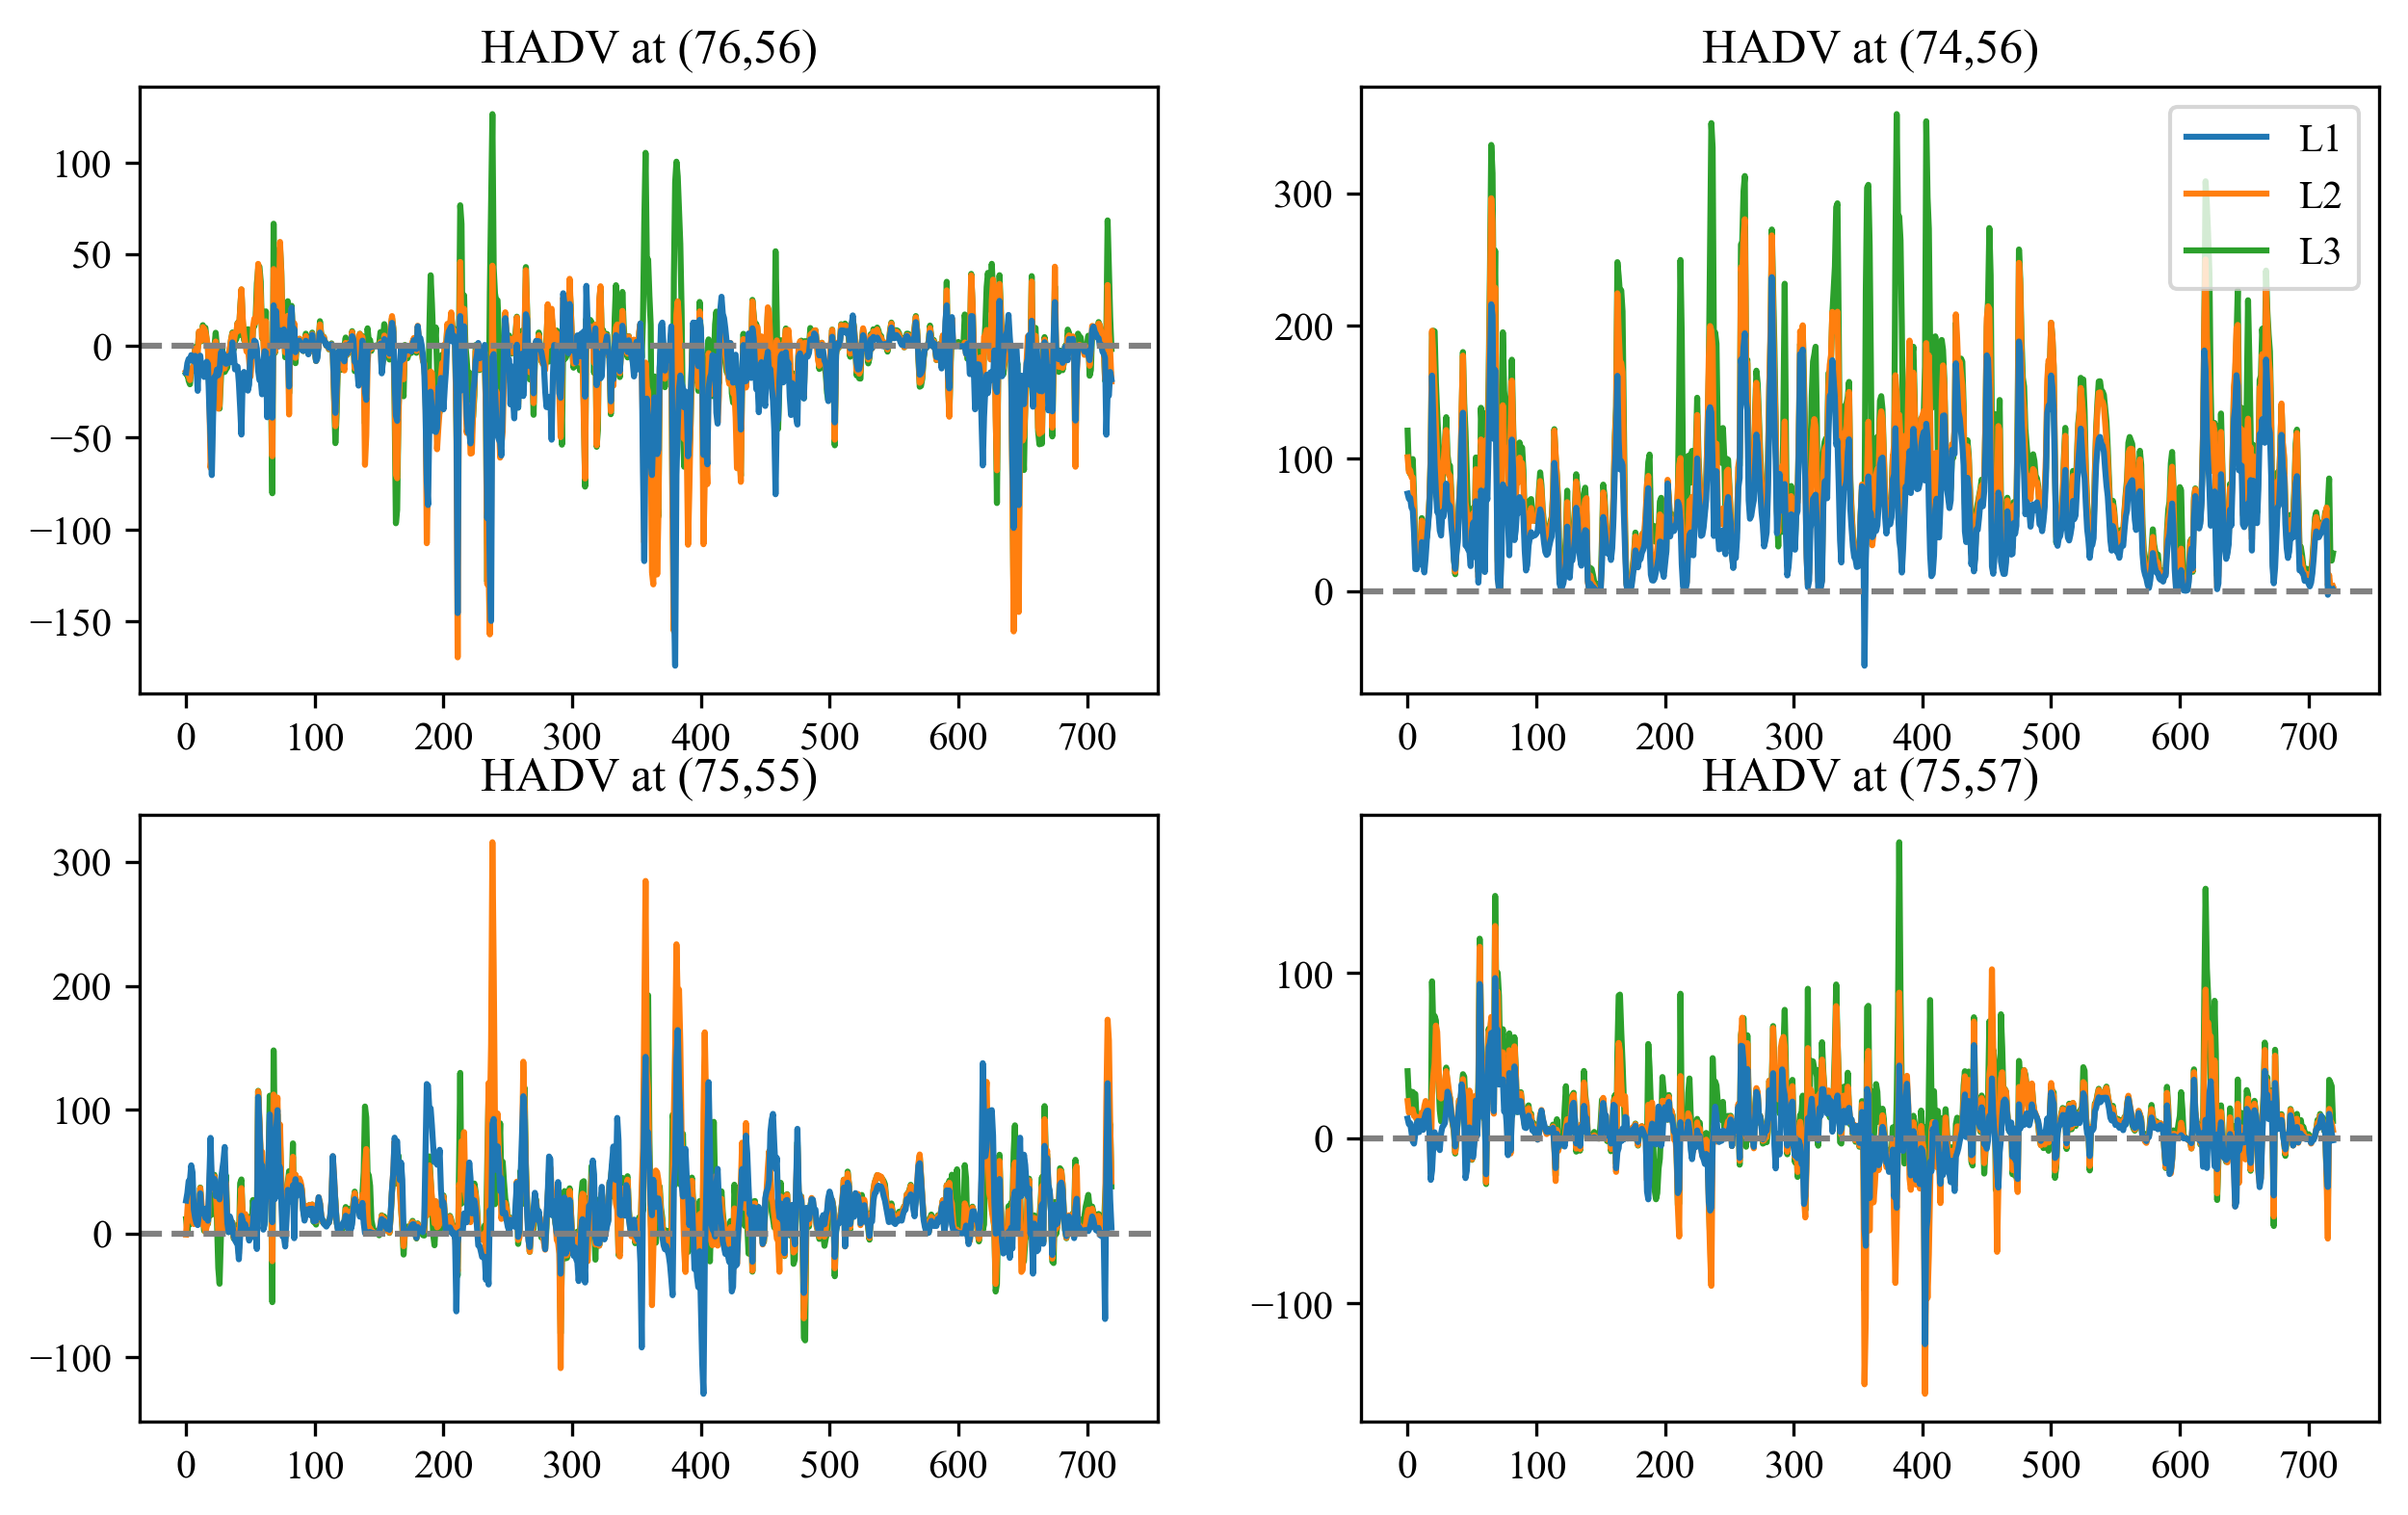

In [40]:
fig = plt.figure(figsize=(10,6),dpi=300)
ax = fig.subplots(2,2)

tstep = np.arange(0,720)

ax[0][0].plot(tstep,hadv_p1[:,0],label='L1',zorder=2)
ax[0][0].plot(tstep,hadv_p1[:,1],label='L2',zorder=1)
ax[0][0].plot(tstep,hadv_p1[:,2],label='L3',zorder=0)
ax[0][0].axhline(y=0,linestyle='--',color='gray')
# ax[0][0].legend(loc=1)
ax[0][0].set_title('HADV at (76,56)')

ax[0][1].plot(tstep,hadv_p2[:,0],label='L1',zorder=2)
ax[0][1].plot(tstep,hadv_p2[:,1],label='L2',zorder=1)
ax[0][1].plot(tstep,hadv_p2[:,2],label='L3',zorder=0)
ax[0][1].axhline(y=0,linestyle='--',color='gray')
ax[0][1].legend(loc=1)
ax[0][1].set_title('HADV at (74,56)')

ax[1][0].plot(tstep,hadv_p3[:,0],label='L1',zorder=2)
ax[1][0].plot(tstep,hadv_p3[:,1],label='L2',zorder=1)
ax[1][0].plot(tstep,hadv_p3[:,2],label='L3',zorder=0)
ax[1][0].axhline(y=0,linestyle='--',color='gray')
# ax[1][0].legend(loc=1)
ax[1][0].set_title('HADV at (75,55)')

ax[1][1].plot(tstep,hadv_p4[:,0],label='L1',zorder=2)
ax[1][1].plot(tstep,hadv_p4[:,1],label='L2',zorder=1)
ax[1][1].plot(tstep,hadv_p4[:,2],label='L3',zorder=0)
ax[1][1].axhline(y=0,linestyle='--',color='gray')
# ax[1][1].legend(loc=1)
ax[1][1].set_title('HADV at (75,57)')
plt.show()

In [41]:
hadv_pp1 = HADV.isel(x=73, y=56).squeeze()
hadv_pp2 = HADV.isel(x=74, y=55).squeeze()
hadv_pp3 = HADV.isel(x=74, y=57).squeeze()
hadv_pp4 = HADV.isel(x=75, y=54).squeeze()
hadv_pp5 = HADV.isel(x=75, y=58).squeeze()
hadv_pp6 = HADV.isel(x=76, y=55).squeeze()
hadv_pp7 = HADV.isel(x=76, y=57).squeeze()
hadv_pp8 = HADV.isel(x=77, y=56).squeeze()

In [54]:
hadv_p0 = HADV.isel(x=75, y=56).squeeze()

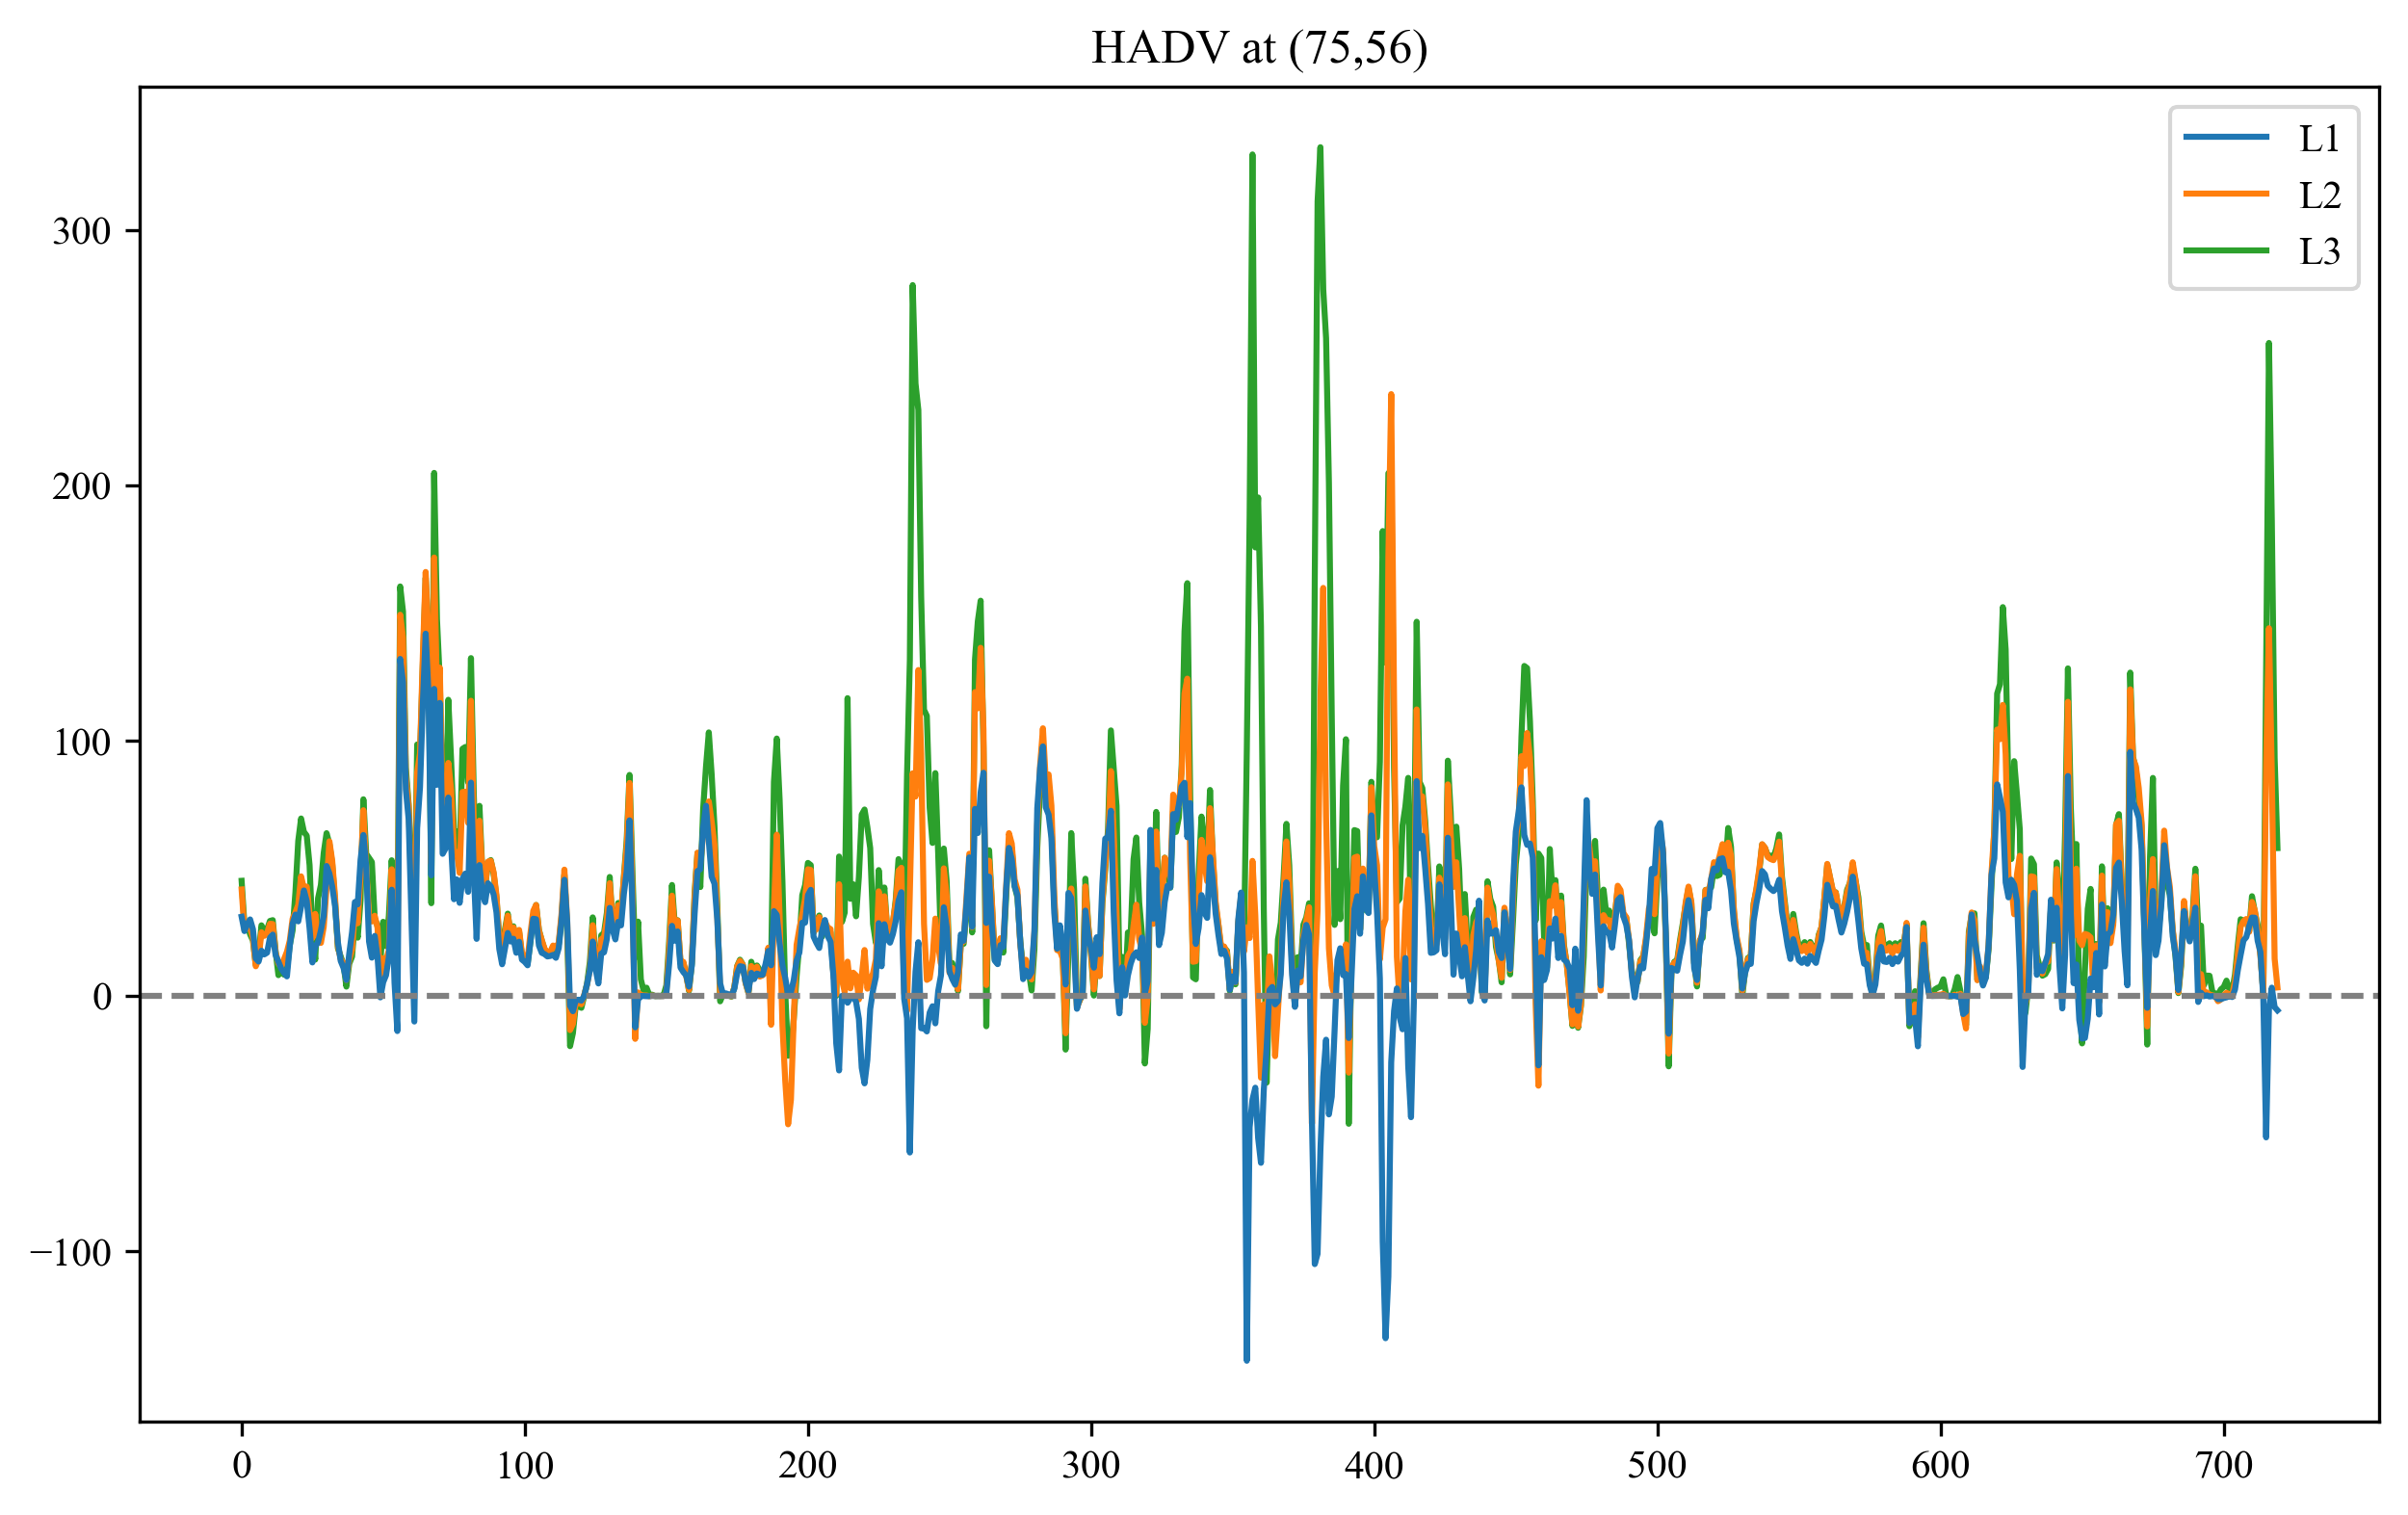

In [55]:
fig = plt.figure(figsize=(10,6),dpi=300)
ax  = fig.subplots(1,1)

tstep = np.arange(0,720)
var   = hadv_p0
ax.plot(tstep,var[:,0],label='L1',zorder=2)
ax.plot(tstep,var[:,1],label='L2',zorder=1)
ax.plot(tstep,var[:,2],label='L3',zorder=0)
ax.axhline(y=0,linestyle='--',color='gray')
ax.legend(loc=1)
ax.set_title('HADV at (75,56)')

plt.show()

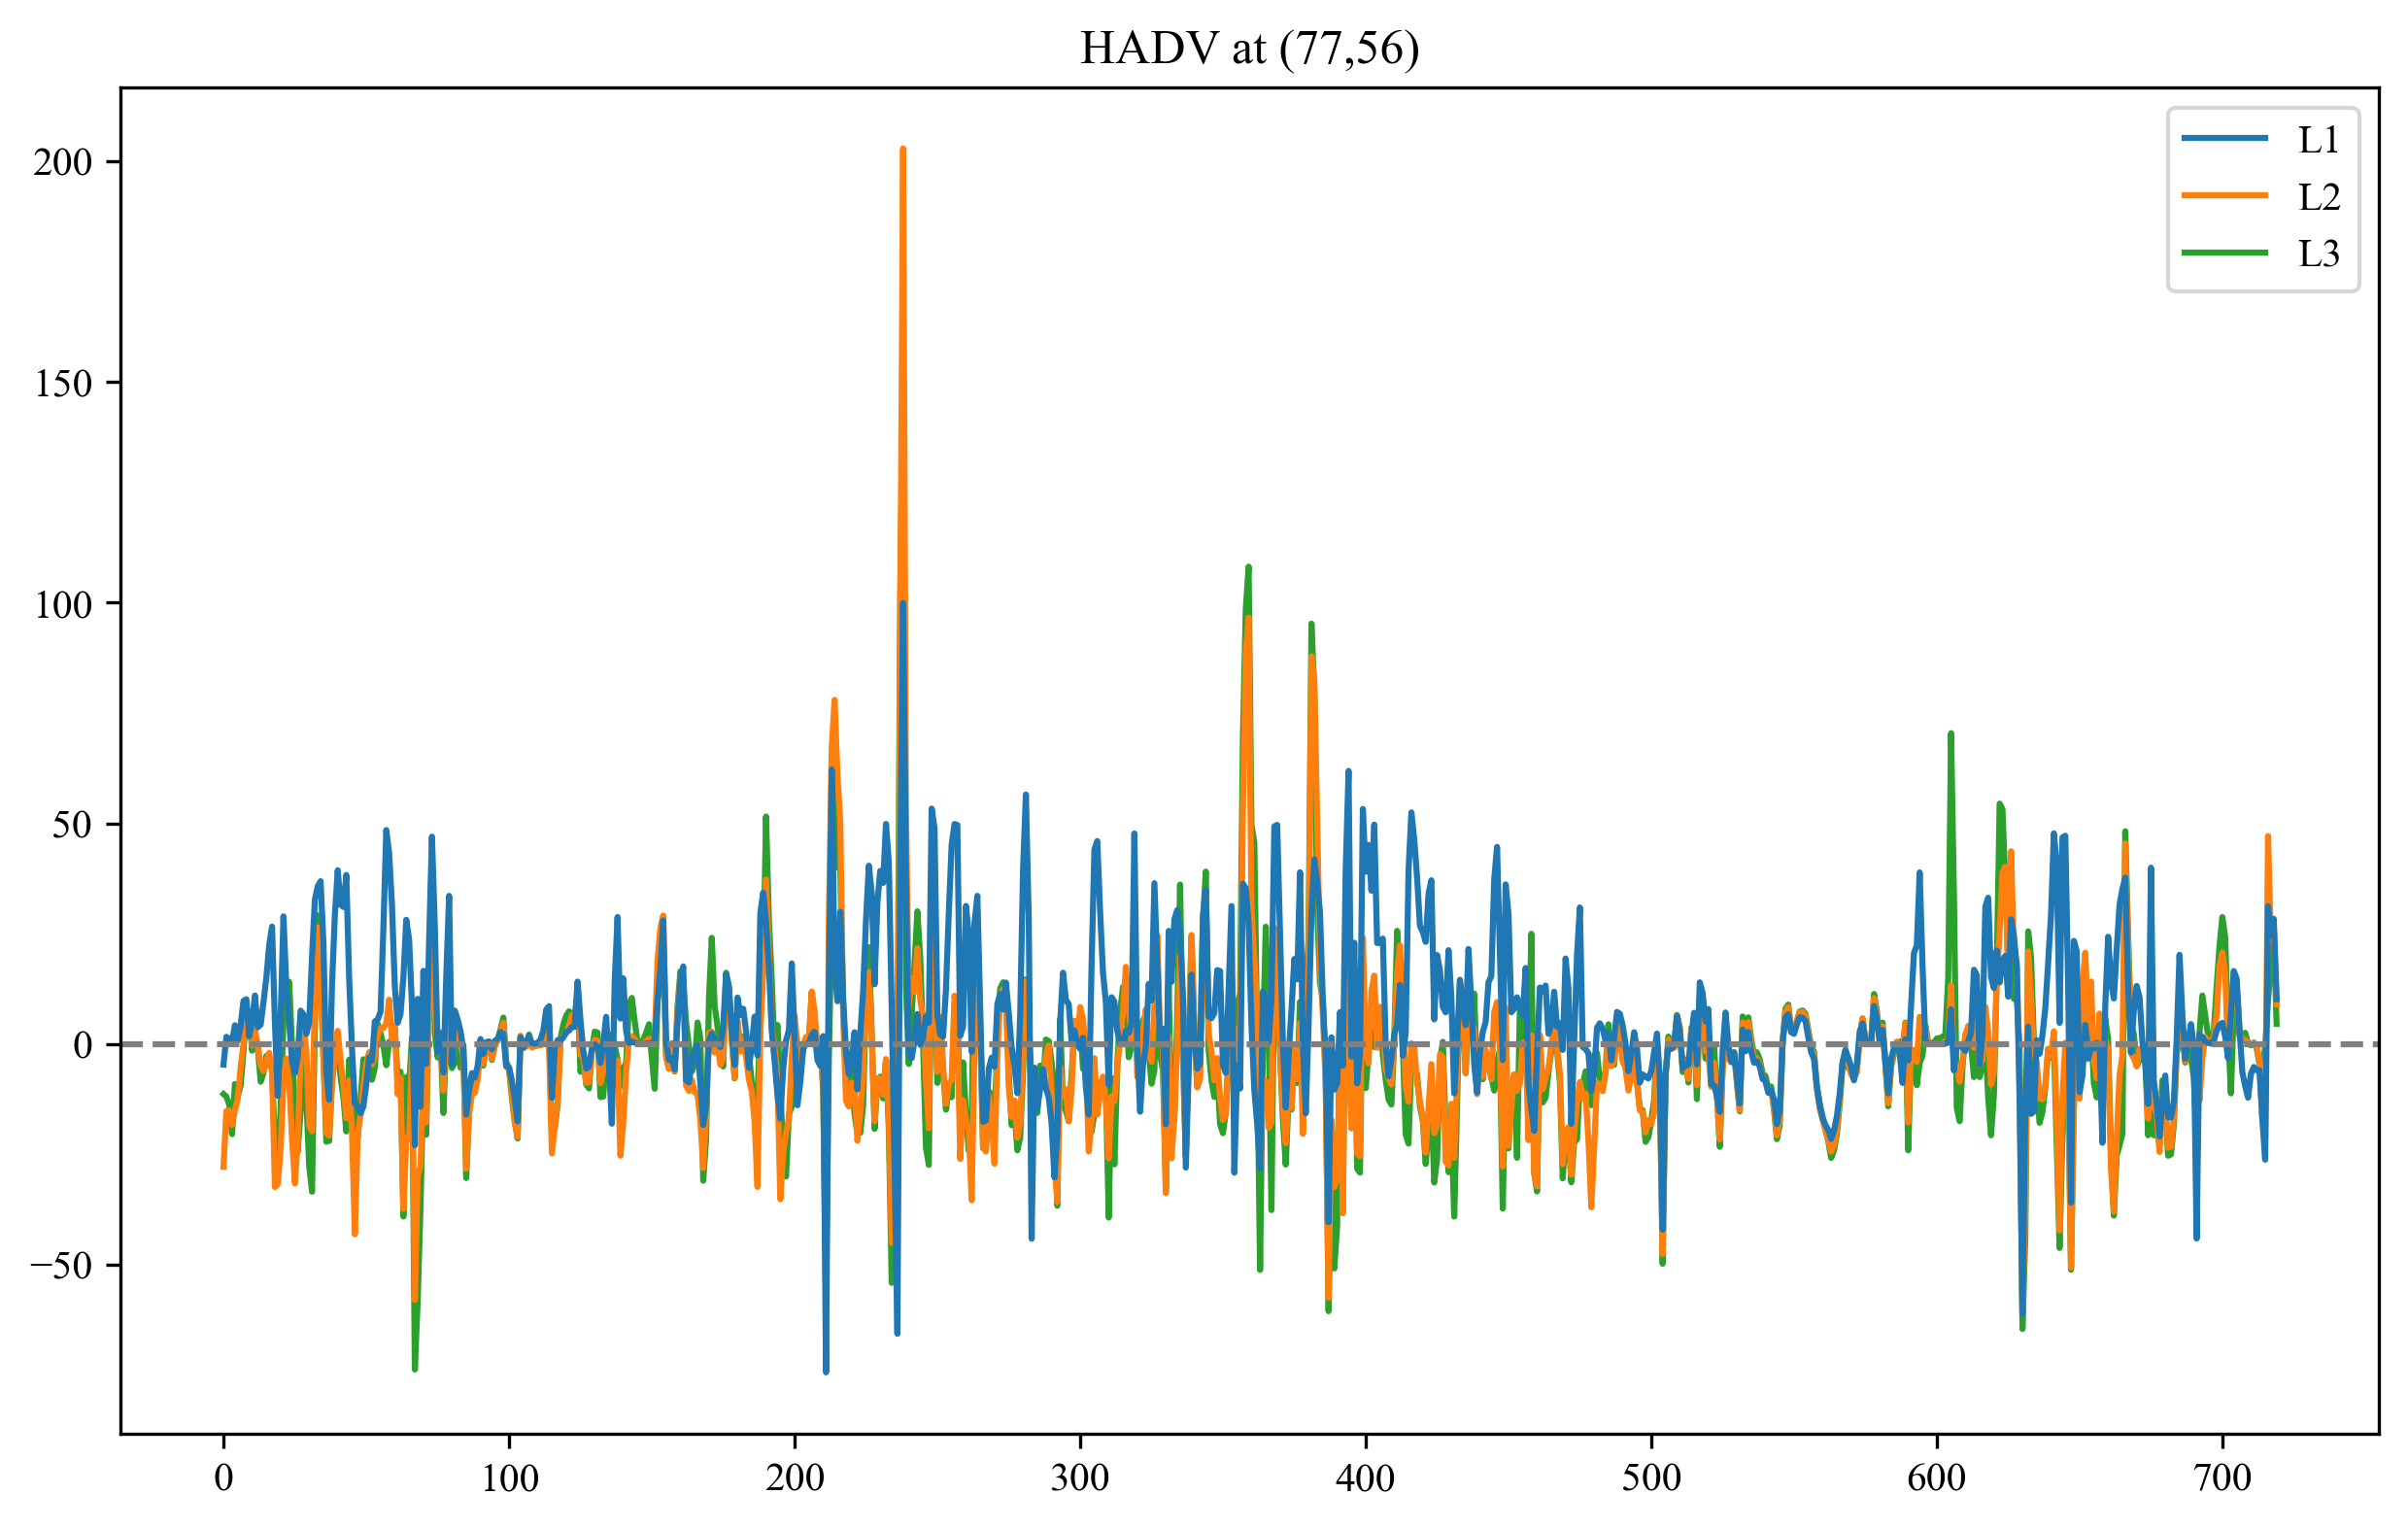

In [ ]:
fig = plt.figure(figsize=(10,6),dpi=300)
ax  = fig.subplots(1,1)

tstep = np.arange(0,720)
var   = hadv_pp8
ax.plot(tstep,var[:,0],label='L1',zorder=2)
ax.plot(tstep,var[:,1],label='L2',zorder=1)
ax.plot(tstep,var[:,2],label='L3',zorder=0)
ax.axhline(y=0,linestyle='--',color='gray')
ax.legend(loc=1)
ax.set_title('HADV at (77,56)')

plt.show()